In [1]:
from utensor_cgen.transformer import TransformerPipeline, Transformer, GENERIC_SENTINEL
from copy import deepcopy

[WARNING quantize.py <module> @ 12] trying to import deprecated quantization transformer


In [2]:
@TransformerPipeline.register_transformer
class MyAddTransformer(Transformer):
    KWARGS_NAMESCOPE = 'myadd_transformer'
    METHOD_NAME = 'myadd_transformer'
    # this transformer is generic and can be applied to any graph
    # or APPLICABLE_LIBS should be a set of library names, such as set(['tensorflow', 'pytorch'])
    APPLICABLE_LIBS = GENERIC_SENTINEL
    
    def transform(self, ugraph):
        new_ugraph = deepcopy(ugraph)
        for op_info in new_ugraph.get_ops_by_type('Add'):
            op_info.op_type = 'MyAddOperator'
        return new_ugraph

In [3]:
pipe = TransformerPipeline(['myadd_transformer'])

In [4]:
from utensor_cgen.frontend import FrontendSelector
from utensor_cgen.ir.misc.graph_viz import viz_graph

In [5]:
ugraph = FrontendSelector.parse('models/simple_graph.pb', ['u'])

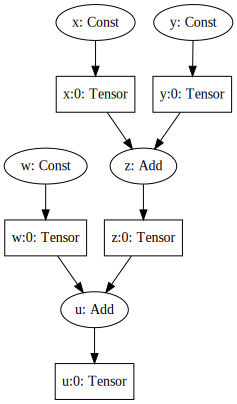

In [6]:
# before transformation
viz_graph(ugraph)

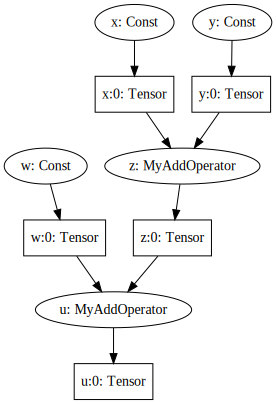

In [7]:
# after transformation
# note that all Add ops has been replaced as MyAddOperator
new_ugraph = pipe.transform(ugraph)
viz_graph(new_ugraph)